# Data Challenge

### A business question we ran into

We sometimes run a/b tests. the main difficulty we face in doing this is, __we sometimes do not know what to do and how to interpret results.__

For instance:
If we have 100 participants in our test group and 98 of those are converting towards a certain goal, while we also have 100 participants in our control group and of those we see only 10 users converting, it is very clear: we should go for the test.

But in real life it unfortunatelly is not always that obvious...
We sometimes do not really know if a result is meaningful or not. This is, what this test is about.

We conducted an a/b-test about recommendation sliders we implemented. __Now we want to know what the test results tell us.__ 

We will go through everything in detail in the next steps.


### Import everything that is necessary in this section

You don't have to do it now. You can also do it later. __But please put everything you import here.__

In [144]:
#import your stuff below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from scipy.stats import normaltest

### Reading csv

__Please start here__
The name of the csv file is 'ga_data_rndm.csv'
It shows randomized sample data from our google analytics account.

In [2]:
df = pd.read_csv('ga_data_rndm.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,ga:date,ga:deviceCategory,ga:dimension13,ga:pageviews,ga:sessions,ga:transactionRevenue,ga:transactions,ga:uniquePageviews
0,0,0,20190101,desktop,"Technical 50-50 AA-T:0,Recommendation Slide:0,...",20471.0,3688.0,5752.689219,16.0,15230
1,1,1,20190101,mobile,"Technical 50-50 AA-T:0,Recommendation Slide:0,...",55935.0,11187.0,13608.661484,63.0,38746
2,2,2,20190101,tablet,"Technical 50-50 AA-T:0,Recommendation Slide:0,...",16573.0,2857.0,1888.473350,16.0,11914
3,3,3,20190102,desktop,"Technical 50-50 AA-T:0,Recommendation Slide:0,...",35192.0,5426.0,1974.257458,16.0,25681
4,4,4,20190102,mobile,"Technical 50-50 AA-T:0,Recommendation Slide:0,...",62595.0,11332.0,16585.946557,24.0,42533


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 10 columns):
Unnamed: 0               763 non-null int64
Unnamed: 0.1             763 non-null int64
ga:date                  763 non-null int64
ga:deviceCategory        763 non-null object
ga:dimension13           763 non-null object
ga:pageviews             763 non-null float64
ga:sessions              763 non-null float64
ga:transactionRevenue    763 non-null float64
ga:transactions          763 non-null float64
ga:uniquePageviews       763 non-null int64
dtypes: float64(4), int64(4), object(2)
memory usage: 59.7+ KB


In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ga:date', 'ga:deviceCategory',
       'ga:dimension13', 'ga:pageviews', 'ga:sessions',
       'ga:transactionRevenue', 'ga:transactions', 'ga:uniquePageviews'],
      dtype='object')

In [6]:
df.shape

(763, 10)

In [104]:
df['ga:deviceCategory'].unique()

array(['desktop', 'mobile', 'tablet'], dtype=object)

### Explanations on the dataframe

__dimension13 indicates the testgroups the users were in.__

__Recommendation Slide:0  always means control group__

__Recommendation Slide:1  always means test group__

If there is no 'Recommendation Slide' in dimension13 it means, the users did not participate in the test. If there are also other strings in dimension13 (like "Second Technical 50:0" or something) those values indicate other tests that ran at the same time. But we are not interested in the results of those tests?


In short: In other groups, beside 'Recommendation Slide', we are not interested.

In [12]:
df['ga:dimension13'].unique()

array(['Technical 50-50 AA-T:0,Recommendation Slide:0,Second Technical 50-:0',
       'Technical 50-50 AA-T:0,Recommendation Slide:0,Second Technical 50-:1',
       'Technical 50-50 AA-T:0,Recommendation Slide:1,Second Technical 50-:0',
       'Technical 50-50 AA-T:0,Recommendation Slide:1,Second Technical 50-:1',
       'Technical 50-50 AA-T:0,Second Technical 50-:0',
       'Technical 50-50 AA-T:0,Second Technical 50-:1',
       'Technical 50-50 AA-T:1,Recommendation Slide:0,Second Technical 50-:0',
       'Technical 50-50 AA-T:1,Recommendation Slide:0,Second Technical 50-:1',
       'Technical 50-50 AA-T:1,Recommendation Slide:1,Second Technical 50-:0',
       'Technical 50-50 AA-T:1,Recommendation Slide:1,Second Technical 50-:1',
       'Technical 50-50 AA-T:1,Second Technical 50-:0',
       'Technical 50-50 AA-T:1,Second Technical 50-:1'], dtype=object)

In [10]:
df['control'] = 0

In [13]:
def f(x):
    if 'Recommendation Slide:0' in x.split(','):
        return 1
    return 0
df['control'] = df['ga:dimension13'].apply(f)

In [14]:
df['control'].unique()

array([1, 0])

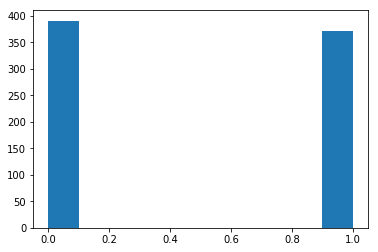

In [23]:
plt.hist(df['control'].tolist())
plt.show()

In [ ]:
df['test'] = 0

In [15]:
def f(x):
    if 'Recommendation Slide:1' in x.split(','):
        return 1
    return 0
df['test'] = df['ga:dimension13'].apply(f)

In [16]:
df['test'].unique()

array([0, 1])

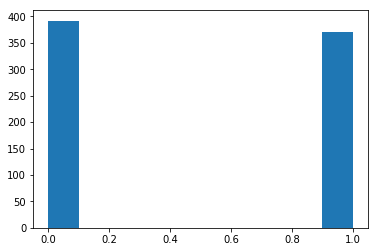

In [24]:
plt.hist(df['test'].tolist())
plt.show()

In [37]:
df_test = df[df['test'] == 1]

In [38]:
df_control = df[df['control'] == 1]

In [39]:
df_test.shape

(371, 12)

In [40]:
df_control.shape

(372, 12)

In [68]:
df_test[df_test['control'] == 1]

,Unnamed: 0,Unnamed: 0.1,ga:date,ga:deviceCategory,ga:dimension13,ga:pageviews,ga:sessions,ga:transactionRevenue,ga:transactions,ga:uniquePageviews,control,test


In [69]:
df_control[df_control['test'] == 1]

,Unnamed: 0,Unnamed: 0.1,ga:date,ga:deviceCategory,ga:dimension13,ga:pageviews,ga:sessions,ga:transactionRevenue,ga:transactions,ga:uniquePageviews,control,test


Same number of participants in the two groups 

In [232]:
def plot_stat(df, colname):
    results = pd.DataFrame()
    results[colname] = df[colname].tolist()
    # descriptive stats
    print(results.describe())
    # box and whisker plot
    results.boxplot()
    pyplot.show()
    # histogram
    results.hist()
    pyplot.show()

In [233]:
def norm_test(values):
    value, p = normaltest(values)
    print(value, p)
    if p >= 0.05:
        #print('It is likely that result1 is normal')
        return True
    else:
        print('It is unlikely that result1 is normal')
        return False

In [234]:
def show_sig_nogauss(df1, df2, colname):
    '''
    Compare Means for Non-Gaussian Results:
    We cannot use the Student t-test or the Welch’s t-test if our data is not Gaussian.
    An alternative statistical significance test we can use for non-Gaussian data is called the Kolmogorov-Smirnov test.
    '''
    # calculate the significance
    value, pvalue = ks_2samp(df1[colname], df2[colname])
    print(value, pvalue)
    if pvalue > 0.05:
        print('Samples are likely drawn from the same distributions (fail to reject H0)')
    else:
        print('Samples are likely drawn from different distributions (reject H0)')

In [235]:
def show_sig_gauss(df1, df2, colname):
    std1 = np.std(df1[colname].values)
    std2 = np.std(df2[colname].values)
    if std1 != std2:
        # Both sets of results are Gaussian and have the same variance; Welch’s t-test.
        value, pvalue = ttest_ind(df1[colname].values, df2[colname].values, equal_var=False)
    else:
        # Both sets of results are Gaussian and have the same variance; Student t-test.
        value, pvalue = ttest_ind(df1[colname].values, df2[colname].values, equal_var=True)
    print(value, pvalue)
    if pvalue > 0.05:
        print('Samples are likely drawn from the same distributions (fail to reject H0)')
    else:
        print('Samples are likely drawn from different distributions (reject H0)')
    

In [236]:
def show_sig(df1, df2, colname):
    if (norm_test(df1[colname].tolist()) == True) and (norm_test(df2[colname].tolist()) == True):
        show_sig_gauss(df1, df2, colname)
    else:
        show_sig_nogauss(df1, df2, colname)

## Invistigate 'ga:pageviews'

       ga:pageviews
count    371.000000
mean   25597.129380
std    15128.132814
min       16.000000
25%    14853.500000
50%    23031.000000
75%    34468.000000
max    68540.000000


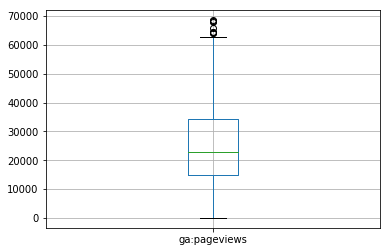

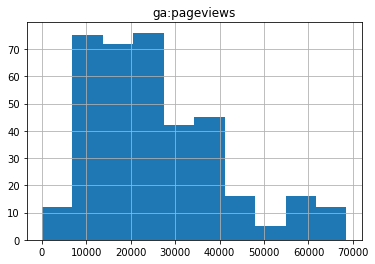

In [237]:
plot_stat(df_test, 'ga:pageviews')

       ga:pageviews
count    372.000000
mean   25869.013441
std    15361.453298
min       16.000000
25%    15319.750000
50%    23248.000000
75%    34126.000000
max    73877.000000


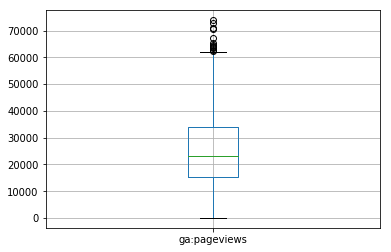

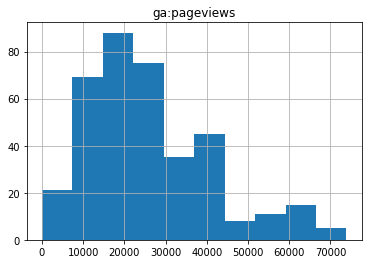

In [238]:
plot_stat(df_control, 'ga:pageviews')

In [239]:
show_sig(df_test, df_control, 'ga:pageviews')

39.44776607634582 2.716604619221591e-09
It is unlikely that result1 is normal
0.03453322899458022 0.9776952180520176
Samples are likely drawn from the same distributions (fail to reject H0)


## Investigate 'ga:sessions'

        ga:sessions
count    371.000000
mean    4948.989218
std     3116.986919
min       15.000000
25%     2641.000000
50%     4123.000000
75%     6428.500000
max    13062.000000


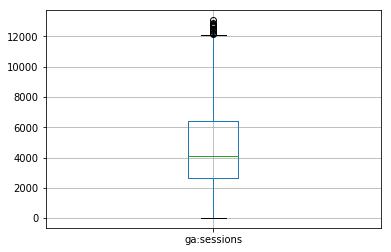

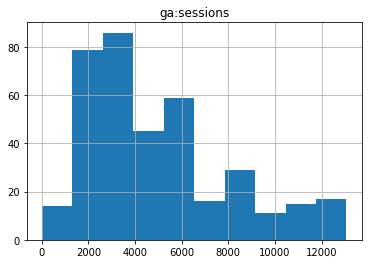

In [240]:
plot_stat(df_test, 'ga:sessions')

        ga:sessions
count    372.000000
mean    4961.698925
std     3149.706900
min       15.000000
25%     2568.250000
50%     4035.500000
75%     6462.500000
max    13290.000000


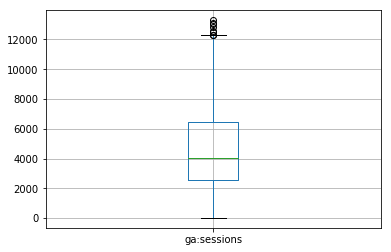

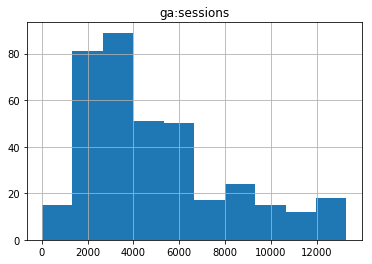

In [241]:
plot_stat(df_control, 'ga:sessions')

In [242]:
show_sig(df_test, df_control, 'ga:sessions')

36.61282907293695 1.1210505172027575e-08
It is unlikely that result1 is normal
0.028867055038692246 0.9974716544789557
Samples are likely drawn from the same distributions (fail to reject H0)


## Investigate 'ga:transactionRevenue'

       ga:transactionRevenue
count             372.000000
mean            10206.901428
std             11889.046316
min                 0.000000
25%              1106.588776
50%              7088.108412
75%             14887.473648
max             68069.951155


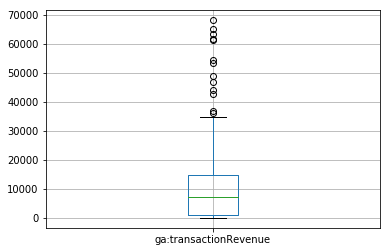

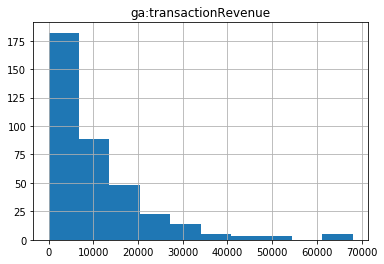

In [243]:
plot_stat(df_control, 'ga:transactionRevenue')

       ga:transactionRevenue
count             371.000000
mean            10158.633272
std             11995.603188
min                 0.000000
25%              1241.117824
50%              6385.674597
75%             14417.102441
max             72329.018516


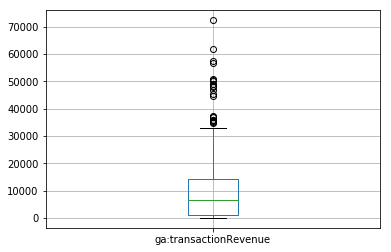

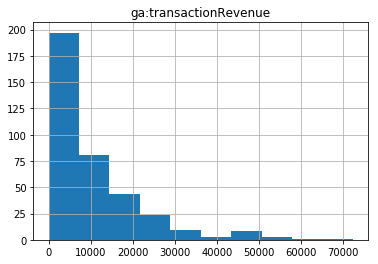

In [244]:
plot_stat(df_test, 'ga:transactionRevenue')

In [245]:
show_sig(df_control, df_test, 'ga:transactionRevenue')

171.670083698797 5.276123721119039e-38
It is unlikely that result1 is normal
0.03369996811871434 0.9826156102766879
Samples are likely drawn from the same distributions (fail to reject H0)


## Investigate 'ga:transactions'

       ga:transactions
count       371.000000
mean         29.520216
std          26.339909
min           0.000000
25%           8.000000
50%          24.000000
75%          47.000000
max         150.000000


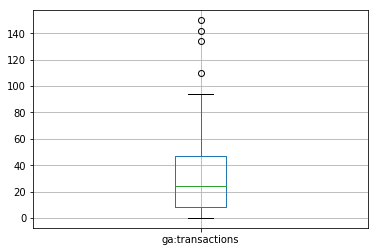

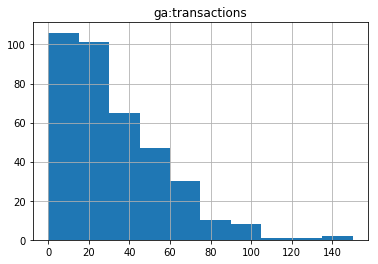

In [246]:
plot_stat(df_test, 'ga:transactions')

       ga:transactions
count       372.000000
mean         29.263441
std          26.208072
min           0.000000
25%           8.000000
50%          24.000000
75%          47.000000
max         142.000000


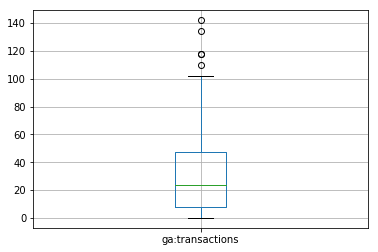

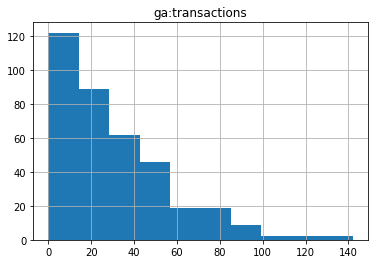

In [247]:
plot_stat(df_control, 'ga:transactions')

In [248]:
show_sig(df_test, df_control, 'ga:transactions')

83.57143002310832 7.123518361967277e-19
It is unlikely that result1 is normal
0.042242703533026116 0.8882320099080425
Samples are likely drawn from the same distributions (fail to reject H0)


## Investigate 'ga:uniquePageviews'

       ga:transactionRevenue
count             371.000000
mean            10158.633272
std             11995.603188
min                 0.000000
25%              1241.117824
50%              6385.674597
75%             14417.102441
max             72329.018516


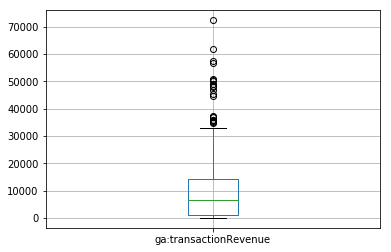

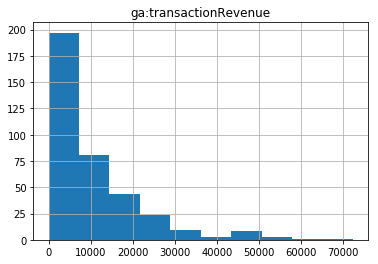

In [249]:
plot_stat(df_test, 'ga:transactionRevenue')

       ga:transactionRevenue
count             372.000000
mean            10206.901428
std             11889.046316
min                 0.000000
25%              1106.588776
50%              7088.108412
75%             14887.473648
max             68069.951155


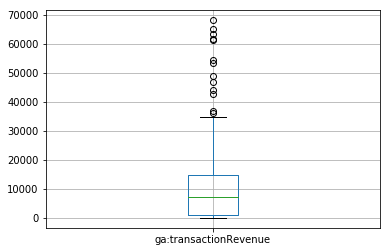

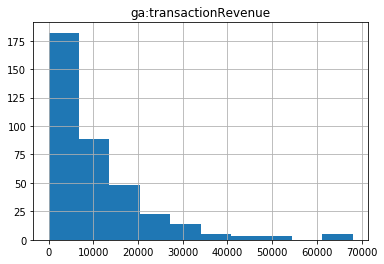

In [250]:
plot_stat(df_control, 'ga:transactionRevenue')

In [251]:
show_sig(df_test, df_control, 'ga:transactionRevenue')

159.4884703864561 2.3308734336558457e-35
It is unlikely that result1 is normal
0.03369996811871434 0.9826156102766879
Samples are likely drawn from the same distributions (fail to reject H0)


## Invistigate 'ga:pageviews' ('desktop')

       ga:pageviews
count    123.000000
mean   24608.577236
std     7556.611114
min       23.000000
25%    19276.000000
50%    23606.000000
75%    29072.500000
max    38591.000000


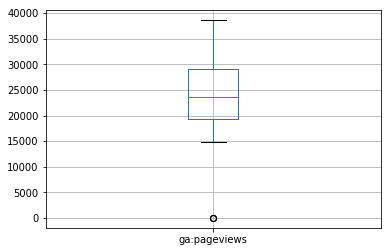

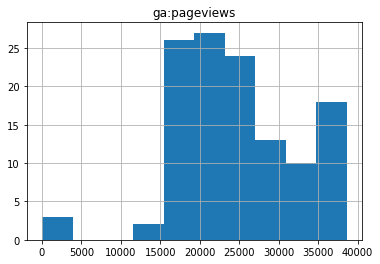

In [252]:
plot_stat(df_test.loc[df_test['ga:deviceCategory'] == 'desktop'], 'ga:pageviews')

       ga:pageviews
count    124.000000
mean   24133.774194
std     7846.030015
min       16.000000
25%    19619.000000
50%    23369.000000
75%    27313.750000
max    41362.000000


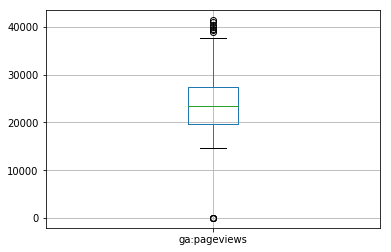

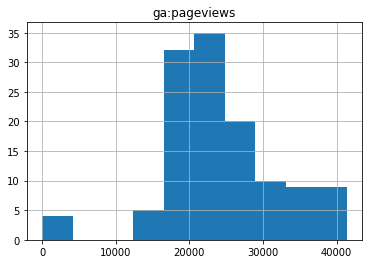

In [253]:
plot_stat(df_control.loc[df_control['ga:deviceCategory'] == 'desktop'], 'ga:pageviews')

In [254]:
show_sig(df_test.loc[df_test['ga:deviceCategory'] == 'desktop'], df_control.loc[df_control['ga:deviceCategory'] == 'desktop'], 'ga:pageviews')

6.69425889935558 0.035185210191800945
It is unlikely that result1 is normal
0.07539994754786261 0.8608211524434995
Samples are likely drawn from the same distributions (fail to reject H0)


## Invistigate 'ga:pageviews' ('mobile')

       ga:pageviews
count    124.000000
mean   39681.741935
std    15203.283967
min      226.000000
25%    28231.750000
50%    38031.500000
75%    50264.500000
max    68540.000000


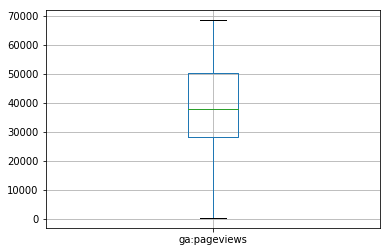

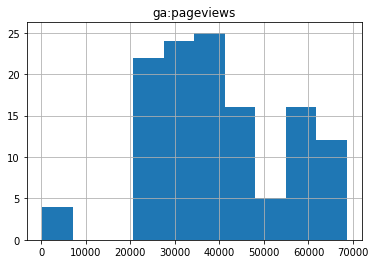

In [255]:
plot_stat(df_test.loc[df_test['ga:deviceCategory'] == 'mobile'], 'ga:pageviews')

       ga:pageviews
count    124.000000
mean   40696.669355
std    14960.376482
min      241.000000
25%    29958.750000
50%    38837.000000
75%    51824.250000
max    73877.000000


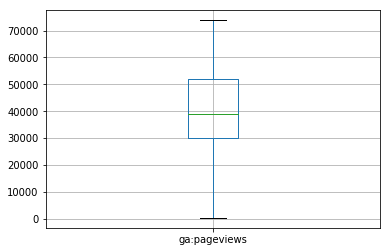

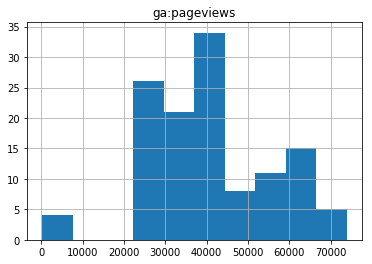

In [256]:
plot_stat(df_control.loc[df_control['ga:deviceCategory'] == 'mobile'], 'ga:pageviews')

In [257]:
show_sig(df_test.loc[df_test['ga:deviceCategory'] == 'mobile'], df_control.loc[df_control['ga:deviceCategory'] == 'mobile'], 'ga:pageviews')

0.001129185841737534 0.9994355664317232
0.895129919207802 0.6391826938470921
-0.5298619104543055 0.5966856890681737
Samples are likely drawn from the same distributions (fail to reject H0)


## Invistigate 'ga:pageviews' ('tablet')

       ga:pageviews
count    124.000000
mean   12493.096774
std     5156.141812
min       16.000000
25%     8860.000000
50%    11694.500000
75%    16619.750000
max    24159.000000


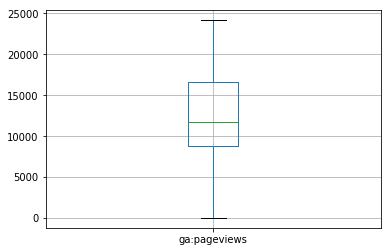

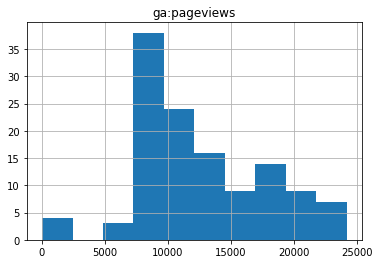

In [258]:
plot_stat(df_test.loc[df_test['ga:deviceCategory'] == 'tablet'], 'ga:pageviews')

       ga:pageviews
count    124.000000
mean   12776.596774
std     5375.808589
min       31.000000
25%     9063.000000
50%    11328.500000
75%    16131.250000
max    27824.000000


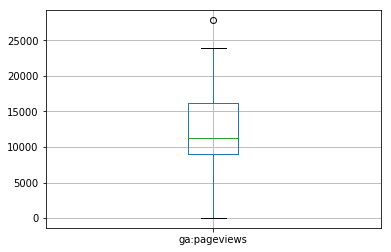

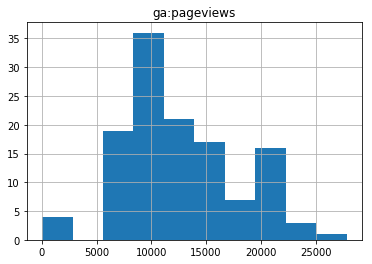

In [259]:
plot_stat(df_control.loc[df_control['ga:deviceCategory'] == 'tablet'], 'ga:pageviews')

In [260]:
show_sig(df_test.loc[df_test['ga:deviceCategory'] == 'tablet'], df_control.loc[df_control['ga:deviceCategory'] == 'tablet'], 'ga:pageviews')

1.0512630862467403 0.5911818895894835
1.9266738283995763 0.38161733465316783
-0.42381434780546373 0.6720721976777498
Samples are likely drawn from the same distributions (fail to reject H0)


## Show device usage

In [261]:
df_test['ga:deviceCategory'].value_counts()

mobile     124
tablet     124
desktop    123
Name: ga:deviceCategory, dtype: int64

In [262]:
df_control['ga:deviceCategory'].value_counts()

mobile     124
tablet     124
desktop    124
Name: ga:deviceCategory, dtype: int64

In [263]:
df_test_mobile = df_test[df_test['ga:deviceCategory'] == 'mobile']

In [264]:
df_test_tablet = df_test[df_test['ga:deviceCategory'] == 'tablet']

In [265]:
df_test_desktop = df_test[df_test['ga:deviceCategory'] == 'desktop']

In [275]:
df_control_mobile = df_control[df_control['ga:deviceCategory'] == 'mobile']
df_control_tablet = df_control[df_control['ga:deviceCategory'] == 'tablet']
df_control_desktop = df_control[df_control['ga:deviceCategory'] == 'desktop']

       ga:pageviews
count    124.000000
mean   39681.741935
std    15203.283967
min      226.000000
25%    28231.750000
50%    38031.500000
75%    50264.500000
max    68540.000000


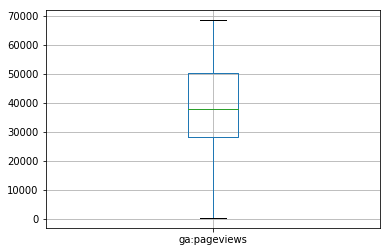

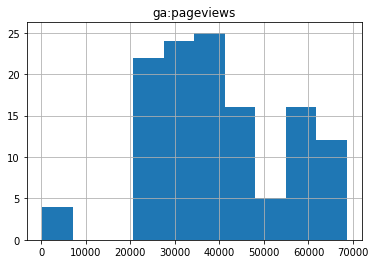

In [267]:
plot_stat(df_test_mobile, 'ga:pageviews')

       ga:pageviews
count    124.000000
mean   12493.096774
std     5156.141812
min       16.000000
25%     8860.000000
50%    11694.500000
75%    16619.750000
max    24159.000000


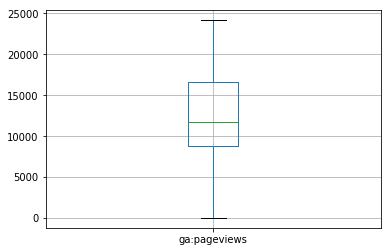

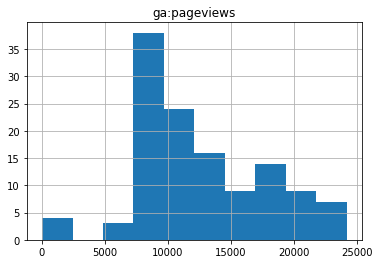

In [268]:
plot_stat(df_test_tablet, 'ga:pageviews')

In [269]:
show_sig(df_test_mobile, df_test_tablet, 'ga:pageviews')

0.001129185841737534 0.9994355664317232
1.0512630862467403 0.5911818895894835
18.859040557046487 1.5925985916161035e-41
Samples are likely drawn from different distributions (reject H0)


       ga:pageviews
count    123.000000
mean   24608.577236
std     7556.611114
min       23.000000
25%    19276.000000
50%    23606.000000
75%    29072.500000
max    38591.000000


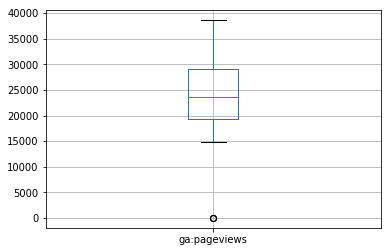

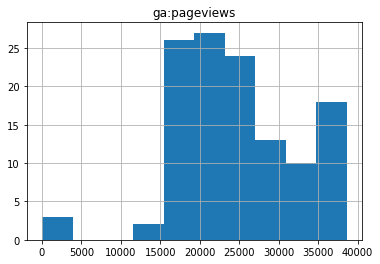

In [270]:
plot_stat(df_test_desktop, 'ga:pageviews')

In [271]:
show_sig(df_test_mobile, df_test_desktop, 'ga:pageviews')

0.001129185841737534 0.9994355664317232
6.69425889935558 0.035185210191800945
It is unlikely that result1 is normal
0.5078022554419093 9.884857485640923e-15
Samples are likely drawn from different distributions (reject H0)


In [272]:
show_sig(df_test_tablet, df_test_desktop, 'ga:pageviews')

1.0512630862467403 0.5911818895894835
6.69425889935558 0.035185210191800945
It is unlikely that result1 is normal
0.7172174141096249 5.786892293953707e-29
Samples are likely drawn from different distributions (reject H0)


In [273]:
show_sig(df_test_mobile, df_test_tablet, 'ga:pageviews')

0.001129185841737534 0.9994355664317232
1.0512630862467403 0.5911818895894835
18.859040557046487 1.5925985916161035e-41
Samples are likely drawn from different distributions (reject H0)


In [276]:
show_sig(df_control_desktop, df_control_mobile, 'ga:pageviews')

8.222976564750567 0.01638337328711867
It is unlikely that result1 is normal
0.6370967741935484 4.926934879405592e-23
Samples are likely drawn from different distributions (reject H0)


In [277]:
show_sig(df_control_mobile, df_control_tablet, 'ga:pageviews')

0.895129919207802 0.6391826938470921
1.9266738283995763 0.38161733465316783
19.557543114394715 1.2993351342716187e-43
Samples are likely drawn from different distributions (reject H0)


In [278]:
show_sig(df_control_desktop, df_control_tablet, 'ga:pageviews')

8.222976564750567 0.01638337328711867
It is unlikely that result1 is normal
0.7016129032258065 7.617372270954082e-28
Samples are likely drawn from different distributions (reject H0)


# Please help us making sense out of this data

After exploring the data:
What can you tell us by looking at the data? What conclusions do you have?

__What does this mean for us and our test?__

__Especially with regards to our test: What should we do and how should we proceed?__

__Is there anything specific with regards to device categories?__

__Any other things you noticed or found interesting?__

Please back your findings with visualisations and aggregated tables


Good luck! 
We are very excited to discuss the findings you have with you.

The findings can be found in the previous sections.
-'ga:pageviews': there is no significant difference between the test group and control group.
-'ga:sessions': there is no significant difference between the test group and control group.
-'ga:transactionRevenue': there is no significant difference between the test group and control group.
-'ga:transactions': there is no significant difference between the test group and control group.
-'ga:uniquePageviews': there is no significant difference between the test group and control group.

The page views of different devices are significant different for the test group.


